# Predicting Winners of Men's Singles Tennis Matches

In this project, I will first review tennis player data from ATP to determine what factors contribute towards winning a singles match in a tennis tournament. I'm using the following data source from Kaggle:   
https://www.kaggle.com/datasets/dissfya/atp-tennis-2000-2023daily-pull/data

## Outline
I will use the following steps to proceed with analysis.
1. **Import Necessary Libraries and Packages**
2. **Data Loading**: Load the ATP dataset.
3. **Data Cleaning**: Handle missing values and ensure data consistency.
4. **Exploratory Data Analysis (EDA)**: Analyze the data to find patterns and relationships; Use plots to visualize the data and findings.
5. **EDA Summary**: Summarize the findings and insights from the EDA.
6. **Next Steps: Data Transformation**: Preparing dataset for machine learning model.

## Import Necessary Libraries and Packages
First, we will import any necessary dependencies.

In [2]:
# Install dependencies as needed:
%pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

## Data Loading
First we will load the ATP datasets from Kaggle.

In [4]:
# Set the path to the file you'd like to load
file_path = "atp_tennis.csv"  # Update this to the correct file name if needed

# Load the latest version
dfatp = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dissfya/atp-tennis-2000-2023daily-pull",
  # "dissfya/atp-tennis-daily-pull",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

C:\Users\sarah\AppData\Local\Temp\ipykernel_15960\3789264042.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfatp = kagglehub.load_dataset(


100%|██████████| 8.38M/8.38M [00:00<00:00, 36.5MB/s]


In [5]:
# Display first 5 records
dfatp.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


## Data Cleaning
Get the number of records, number of columns, and check for missing values.

In [6]:
# get shape of the dataframe
print("Shape of the dataframe:", dfatp.shape)

Shape of the dataframe: (65974, 17)


In [7]:
# check for missing values
missing_values = dfatp.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64


In [8]:
# List all Variables in the dataset
dfatp.dtypes

Tournament     object
Date           object
Series         object
Court          object
Surface        object
Round          object
Best of         int64
Player_1       object
Player_2       object
Winner         object
Rank_1          int64
Rank_2          int64
Pts_1           int64
Pts_2           int64
Odd_1         float64
Odd_2         float64
Score          object
dtype: object

## Exploratory Data Analysis
In this step, we will generate descriptive statistics on our dataset.

Number of Unique Tournaments: 266


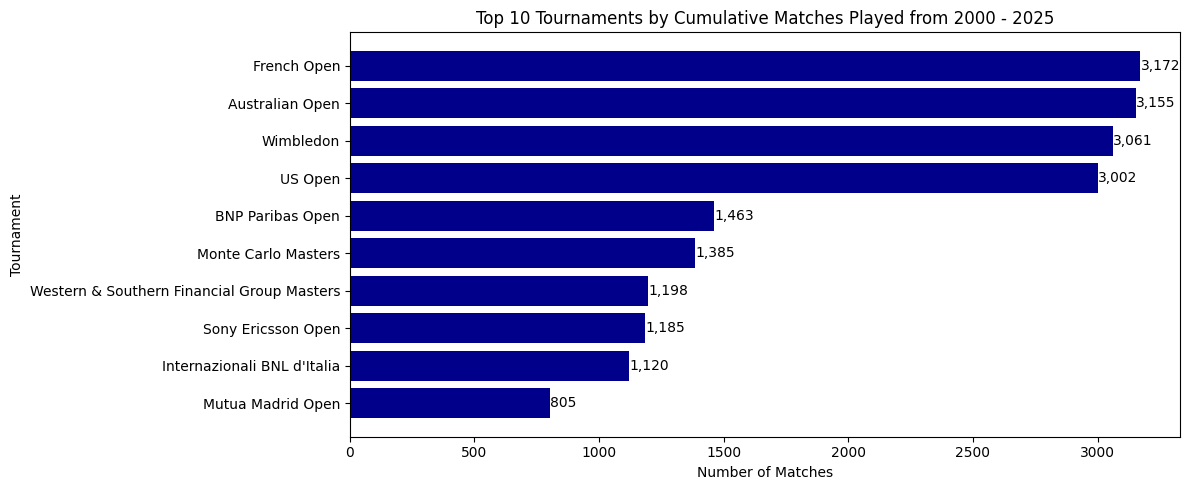

In [9]:
# Display all Unique Tournaments and total number of matches played
print("Number of Unique Tournaments:", dfatp['Tournament'].nunique())

# Create a frequency table of tournaments with key characteristics
tournament_freq = dfatp.groupby(['Tournament'])\
                    .size()\
                    .reset_index(name='Frequency')\
                    .sort_values('Frequency', ascending=False)

# Print frequency table
# print("Tournament Frequency Table: Cumulative Number of Matches Played from 2000 - 2025\n", dfatp['Tournament'].value_counts().head(10))

# Display the top 10 tournaments by frequency in a bar graph
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 5))

# Sort the data in descending order
sorted_data = tournament_freq.sort_values('Frequency', ascending=True).tail(10)  # Using tail() since we're plotting in ascending order

# Create horizontal bars
bars = plt.barh(sorted_data['Tournament'], sorted_data['Frequency'], color='darkblue')

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f'{int(width):,}',
             ha='left', va='center')

plt.ylabel('Tournament')
plt.xlabel('Number of Matches')
plt.title('Top 10 Tournaments by Cumulative Matches Played from 2000 - 2025')
plt.tight_layout()

In [13]:
# List all the rounds in the dataset
rounds = dfatp['Round'].unique()
print("Unique Rounds in the Dataset:", rounds)

Unique Rounds in the Dataset: ['1st Round' '2nd Round' 'Quarterfinals' 'Semifinals' 'The Final'
 '3rd Round' '4th Round' 'Round Robin']


In [14]:
# List the tournaments that have 'Round Robin' under 'Round'
round_robin_tournaments = dfatp[dfatp['Round'] == 'Round Robin']['Tournament'].unique()
print("Tournaments with 'Round Robin' Round:", round_robin_tournaments)

Tournaments with 'Round Robin' Round: ['Masters Cup' 'Next Generation Adelaide International'
 'International Championships' 'Movistar Open' 'Copa Telmex'
 'Channel Open']


Count of Unique Tournaments: 266


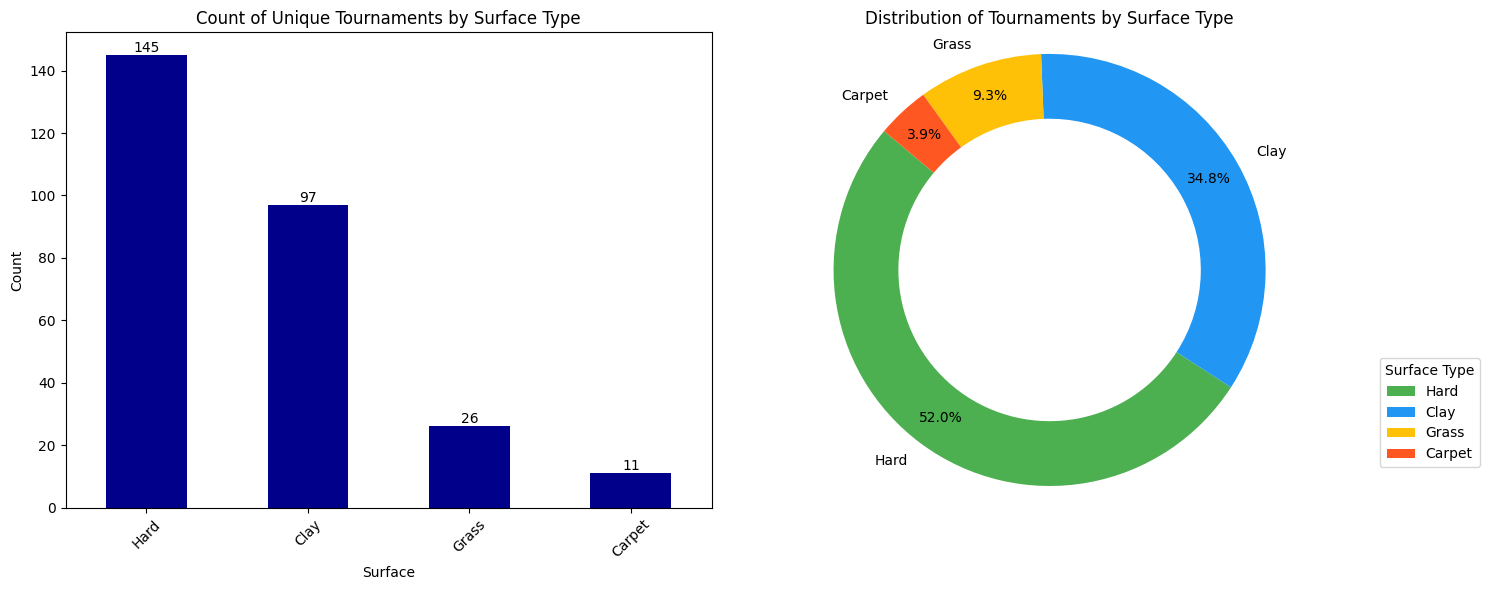

In [35]:
# Display the count of unique Tournaments
print("Count of Unique Tournaments:", dfatp['Tournament'].nunique())

# Count of unique Tournaments by surface in a bar graph with data labels
surface_counts = dfatp.groupby('Surface')['Tournament'].nunique().sort_values(ascending=False)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart on the left
surface_counts.plot(kind='bar', color='darkblue', ax=ax1)
ax1.set_title('Count of Unique Tournaments by Surface Type')
ax1.set_xlabel('Surface')
ax1.set_ylabel('Count')

# Add data labels on bars
for index, value in enumerate(surface_counts):
    ax1.text(index, value, str(value), ha='center', va='bottom')
ax1.tick_params(axis='x', rotation=45)

# Donut chart on the right
ax2.pie(surface_counts, 
        labels=surface_counts.index, 
        autopct='%1.1f%%', 
        pctdistance=0.85,  # Move percentage labels closer to edge
        startangle=140, 
        colors=['#4CAF50', '#2196F3', '#FFC107', '#FF5722'],
        wedgeprops=dict(width=0.3))
ax2.set_title('Distribution of Tournaments by Surface Type')
ax2.axis('equal')
ax2.legend(title='Surface Type', loc='center left', bbox_to_anchor=(1, 0.2))

plt.tight_layout()

Top Players with Most Matches Played:
         Player  Matches Played
0   Federer R.            1393
1  Djokovic N.            1245
2     Nadal R.            1214
3    Ferrer D.            1035
4  Verdasco F.             955
5   Gasquet R.             952
6     Lopez F.             933
7    Murray A.             924
8   Berdych T.             885
9  Wawrinka S.             878


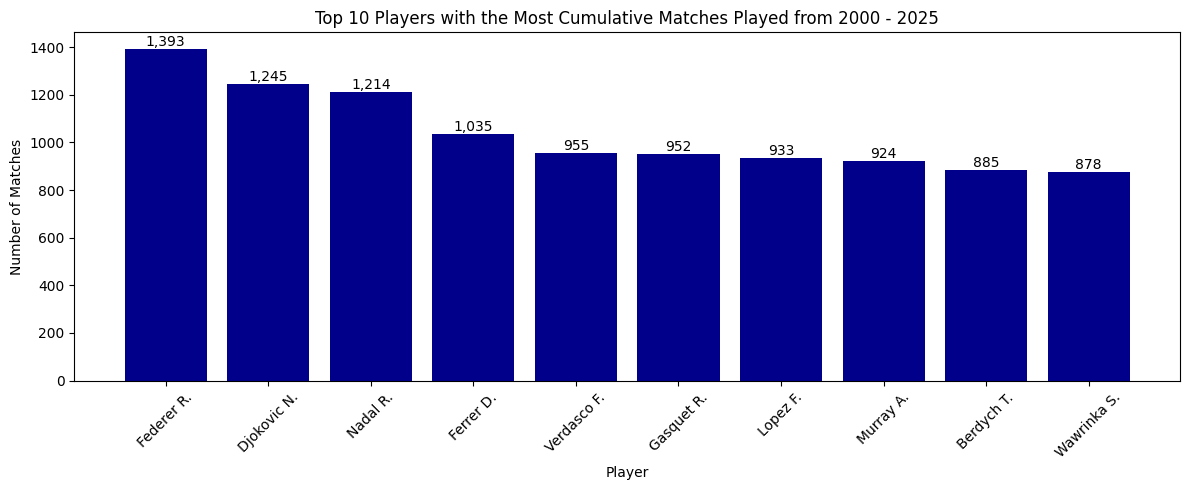

In [10]:
# Display Players (player 1 and player 2) with the most matches played
import pandas as pd

top_players = pd.concat([
	dfatp['Player_1'].value_counts(),
	dfatp['Player_2'].value_counts()
]).groupby(level=0).sum().sort_values(ascending=False).head(10).reset_index()
top_players.columns = ['Player', 'Matches Played']
print("Top Players with Most Matches Played:\n", top_players)

# Set the figure size
plt.figure(figsize=(12, 5))

# Create a bar graph for top players who played the most matches
bars = plt.bar(top_players['Player'], top_players['Matches Played'], color='darkblue')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.xlabel('Player')
plt.ylabel('Number of Matches')
plt.title('Top 10 Players with the Most Cumulative Matches Played from 2000 - 2025')
plt.xticks(rotation=45)
plt.tight_layout()

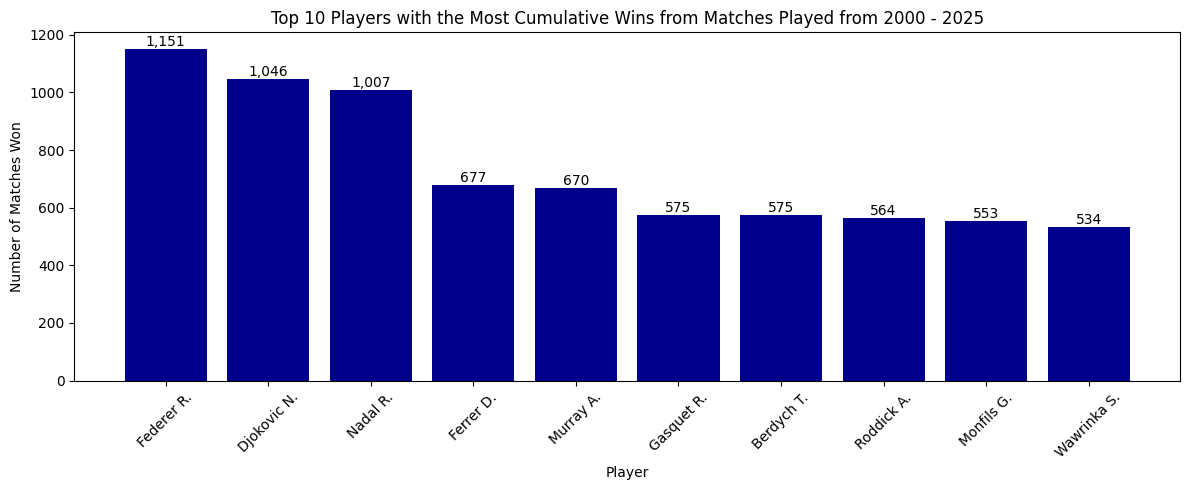

In [11]:
# Display Top 10 Players with the most wins
top_winners = dfatp['Winner'].value_counts().head(10).reset_index()
top_winners.columns = ['Player', 'Wins']

# Set the figure size
plt.figure(figsize=(12, 5))

# Create a bar graph for top players with the most wins
bars = plt.bar(top_winners['Player'], top_winners['Wins'], color='darkblue')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.xlabel('Player')
plt.ylabel('Number of Matches Won')
plt.title('Top 10 Players with the Most Cumulative Wins from Matches Played from 2000 - 2025')
plt.xticks(rotation=45)
plt.tight_layout()

## Summary of Exploratory Data Analysis
Based on this dataset, over 65,000 matches were played across 266 unique Tournaments between 2000 and 2025, with the greatest number of matches played at the 4 major Grand Slams: French Open, Australian Open, Wimbledon, US Open. Over half of the tournaments are played on hard surfaces. Among the top 5 players with the greatest number of winning matches are: Federer, Djokovic, Nadal, Ferrer, and Murray. Given that 3 of these 5 have retired, their records will be filtered out prior to building our model to predict winners of singles matches played in the tournaments.

## Next Steps: Data Transformation
In my next step, I will transform the dataset in preparation for modeling. I plan on including the following tournament-related attributes: [Tournament], [Date], [Series], [Court], [Surface], [Pts_1], [Pts_2], [Odd_1], [Odd_2]. Additionally, it is important to exclude players who have already retired, which can be done by referencing https://www.itia.tennis/anti-doping/retired-players-list/.